In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Two sample t-test (unpaired or independent t-test)
* Assumptions
1. Observations in two groups have an approximately normal distribution (Shapiro-Wilks Test)
2. Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
3. The two groups are sampled independently from each other from the same population


In [8]:
import numpy as np
import statsmodels.api as sm
import pylab as py
from scipy.stats import shapiro
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

In [9]:
import scipy

In [10]:
gen1 = pd.read_excel('Haemoglobin_ga.xlsx')

In [11]:
gen = gen1.dropna()

In [12]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100833 entries, 0 to 101764
Columns: 106 entries, RecNo to HB
dtypes: float64(102), int64(3), object(1)
memory usage: 82.3+ MB


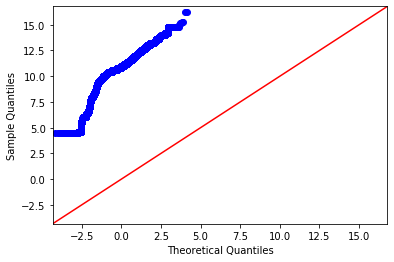

In [13]:
df1= gen[gen['Gender'] == 'Female']
sm.qqplot(df1['HB'], line ='45')
py.show()

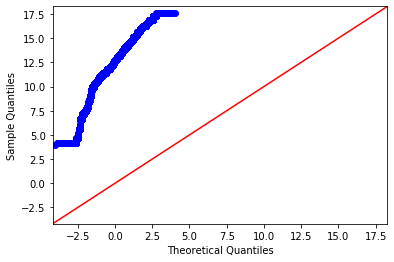

In [14]:
df2= gen[gen['Gender'] == 'Male']
sm.qqplot(df2['HB'], line ='45')
py.show()

In [15]:
#perform Shapiro-Wilk test
shapiro(df1['HB'])



C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9116158485412598, 0.0)

In [16]:
shapiro(df2['HB'])
#NOT NORMAL

(0.9651244282722473, 0.0)

In [17]:
meandf1=np.mean(df1['HB'])
meandf1

10.942088482677232

In [18]:
meandf2=np.mean(df2['HB'])
meandf2

12.591248891811947

In [19]:
std_dev_df1=np.std(df1['HB'])
std_dev_df1


1.3415925914785247

In [20]:
var_df1=np.var(df1['HB'])
var_df1


1.799870681510064

In [21]:
std_dev_df2=np.std(df2['HB'])
std_dev_df2

2.04681155249149

In [22]:
var_df2=np.var(df2['HB'])
var_df2

4.189437531412622

In [23]:
df1['zscore']=(df1['HB']-meandf1)/(std_dev_df1)
df1

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RecNo,Serial,Hospital ID,Age,Gender,s0,s1,s2,s3,s4,...,s92,s93,s94,s95,s96,s97,s98,s99,HB,zscore
0,1,3790,0,21.0,Female,1.111572,1.089060,1.070785,1.054095,1.038819,...,0.548618,0.546023,0.544359,0.542551,0.537139,0.536306,0.536732,0.537626,10.5,-0.329525
3,4,3832,0,27.0,Female,0.885337,0.871370,0.855679,0.837118,0.816210,...,0.431123,0.429914,0.428533,0.426977,0.423179,0.422927,0.423201,0.423924,10.0,-0.702217
5,6,3836,0,21.0,Female,0.921972,0.903810,0.888554,0.871180,0.850961,...,0.410122,0.407479,0.405467,0.403923,0.401074,0.401350,0.402422,0.403270,11.5,0.415858
6,7,3845,0,30.0,Female,0.882571,0.870492,0.860353,0.846510,0.828638,...,0.459679,0.457726,0.456922,0.456308,0.452211,0.450978,0.449994,0.448957,10.5,-0.329525
7,8,3848,0,57.0,Female,1.034465,1.019367,1.010268,1.001753,0.991543,...,0.555070,0.553040,0.551716,0.550982,0.546940,0.546353,0.545545,0.545193,12.2,0.937626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,101761,1272,2,60.0,Female,0.944481,0.936851,0.933647,0.924879,0.914422,...,0.505947,0.502221,0.499196,0.495792,0.492888,0.489912,0.487988,0.486480,12.0,0.788549
101761,101762,1272,2,60.0,Female,0.953750,0.943192,0.938576,0.930557,0.920534,...,0.508857,0.505084,0.503612,0.501019,0.498227,0.494874,0.491237,0.489598,12.0,0.788549
101762,101763,1272,2,60.0,Female,0.950452,0.941978,0.936802,0.927402,0.917317,...,0.506535,0.502254,0.500789,0.498837,0.496110,0.491385,0.488431,0.487415,12.0,0.788549
101763,101764,1272,2,60.0,Female,0.955741,0.946137,0.941490,0.932453,0.921778,...,0.511350,0.507332,0.504680,0.502769,0.500643,0.497776,0.492578,0.489961,12.0,0.788549


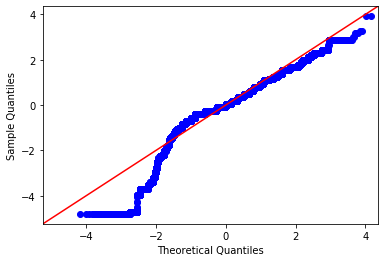

In [24]:
sm.qqplot(df1['zscore'], line ='45')
py.show()

In [25]:
df2['zscore']=(df2['HB']-meandf2)/(std_dev_df2)
df2

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RecNo,Serial,Hospital ID,Age,Gender,s0,s1,s2,s3,s4,...,s92,s93,s94,s95,s96,s97,s98,s99,HB,zscore
1,2,3801,0,28.0,Male,1.094853,1.077337,1.063737,1.050125,1.036282,...,0.580230,0.577882,0.576050,0.574224,0.569061,0.569617,0.571440,0.572906,13.0,0.199701
2,3,3803,0,27.0,Male,0.926640,0.911944,0.899565,0.887503,0.872969,...,0.483731,0.482222,0.481263,0.479601,0.475846,0.476002,0.476918,0.477353,13.3,0.346271
4,5,3833,0,21.0,Male,0.997230,0.980019,0.967419,0.954938,0.940028,...,0.537118,0.534293,0.531999,0.530141,0.525994,0.526979,0.528911,0.530336,10.5,-1.021711
8,9,3849,0,60.0,Male,1.097985,1.085715,1.077696,1.069294,1.059790,...,0.628197,0.623932,0.620924,0.619052,0.613255,0.611342,0.609801,0.608618,13.8,0.590553
9,10,3853,0,46.0,Male,1.003752,0.993955,0.986518,0.978454,0.967773,...,0.541920,0.539246,0.537857,0.537582,0.533521,0.532441,0.530999,0.529837,11.0,-0.777428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101566,101567,1269,2,41.0,Male,0.990950,0.977950,0.968376,0.952068,0.934988,...,0.523791,0.521678,0.517329,0.515743,0.513228,0.510497,0.505381,0.501767,7.7,-2.389692
101567,101568,1269,2,41.0,Male,0.985895,0.974806,0.963180,0.946035,0.929421,...,0.521680,0.518733,0.514049,0.511949,0.511027,0.508147,0.503681,0.500785,7.7,-2.389692
101568,101569,1269,2,41.0,Male,0.990487,0.978743,0.967760,0.950995,0.933786,...,0.521240,0.518258,0.513616,0.511237,0.509565,0.506544,0.502743,0.499357,7.7,-2.389692
101569,101570,1269,2,41.0,Male,0.983855,0.974546,0.965173,0.948756,0.931447,...,0.519058,0.515267,0.509142,0.506721,0.506643,0.505212,0.502001,0.498367,7.7,-2.389692


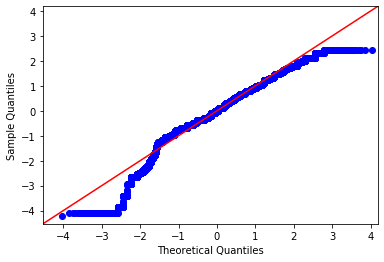

In [26]:
sm.qqplot(df2['zscore'], line ='45')
py.show()

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65866 entries, 0 to 101764
Columns: 107 entries, RecNo to zscore
dtypes: float64(103), int64(3), object(1)
memory usage: 54.3+ MB


In [28]:
stat, p = mannwhitneyu(df1['HB'], df2['HB'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
#Reject H0 both are not from same sampling distn

Statistics=503853729.000, p=0.000


# F test


In [23]:
x = df1['HB']
y = df2['HB']

In [24]:
x = np.array(x)
x


array([10.5, 10. , 11.5, ..., 12. , 12. , 12. ])

In [25]:
y=np.array(y)
y

array([13. , 13.3, 10.5, ...,  7.7,  7.7,  7.7])

In [26]:
F = var_df1 / var_df2
F

0.42962108111519487

In [38]:
#define F-test function
def f_test(x, y):
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [39]:
#perform F-test
f_test(x, y)

(0.4296153172085103, 1.0)

# T test

In [41]:
from scipy import stats

t_value,p_value=stats.ttest_ind(x,y)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value<=alpha:

    print('Reject')

else:

    print('Accept')

Test statistic is -153.730767
p-value for two tailed test is 0.000000
Reject
